<center><h2 style="color:#B01E68">Implementing a Linear Regression Model</h2></center>

Hello stranger!

I created this Jupyter Notebook to make justice to Linear Regression, a very interesting topic that I believe is commonly overlooked or taught in an uninteresting manner. I tried to explain the concept in easy terms, often using abstractions. Several plots, and animations are included to help visualize the procedure and showcase how elegant it is.

If you happen to run this notebook on [Binder](https://mybinder.org/v2/gh/LucasOpoka/Machine_Learning/HEAD) or your own PC know that all the plots are interactive, so you can zoom, move around, rotate the 3D ones, or save them as pictures. Feel free to change any parameters of the code and experiment!

Let the journey begin! I hope you will find it is interesting as I did :)

<center><h3 style="color:#DC3535">1. Loading Python Modules and Training Data

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as tick
%matplotlib widget

Next we load ther Iris dataset, possibly the most popular dataset across all of data science. It contains 150 observations Iris flowers, with columns containing sepal length[cm], sepal width[cm], petal length[cm], petal width[cm], and finally the Iris species. Below we load the data and display its first five rows.

In [64]:
data = np.genfromtxt('iris.data', delimiter=',', dtype=object)
data[:5]

array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
       [b'5.0', b'3.6', b'1.4', b'0.2', b'Iris-setosa']], dtype=object)

The model we are implementing will predict the length of an Iris flower petal, based on that petal's width. Now lets consider that Linear regression is a supervised Machine Learning method, where we need a labeled training dataset to develop a prediction model. In other words we need pairs of inputs and corresponding expected outputs, that will be used to train our linear regression model.

Our training set will consist of 150 pairs of inputs and outputs which are respectively observations of petal widths, and petal lengths. Accordingly we save the petal width column as x_train and the petal length column as y_train. Next we plot petal width vs petal length below. 

Text(0, 0.5, 'Petal Length [cm]')

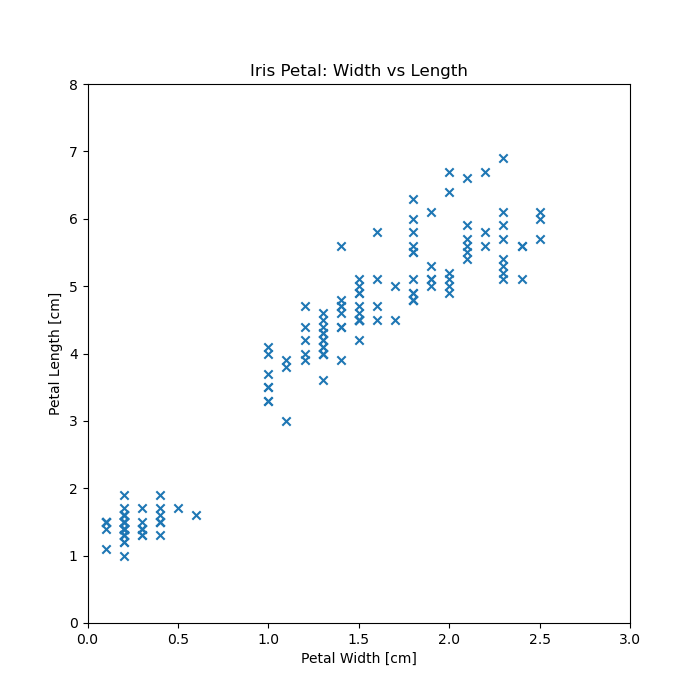

In [65]:
#Saving the data
x_train = data[:, 3].astype(float)
y_train = data[:, 2].astype(float)

#Ploting the data
fig1 = plt.figure(dpi=100)
fig1.set_figheight(7)
fig1.set_figwidth(7)

ax1 = fig1.add_subplot(111)
ax1.scatter(x_train, y_train, marker = 'x')
ax1.set_xlim(0,3)
ax1.set_ylim(0,8)
ax1.set_title('Iris Petal: Width vs Length')
ax1.set_xlabel('Petal Width [cm]')
ax1.set_ylabel('Petal Length [cm]')

<center><h3 style="color:#DC3535">2. Straight Line Equation and Cost Function</h3></center>

Lets consider that any straight line, is defined by two parameters: $a$ - slope and $b$ - intercept as in the equation below. To avoid confusion, the term $(i)$ doesn't represent an exponent, it stands for the i-th value in our $x\_train$.

$$y\_predicted^{(i)} = a*x\_train^{(i)}+b \tag{1}$$

Now the fun begins, how do we fit a line to all the points in our training dataset? We could arbitrarily choose parameters $a$ and $b$ until we get a line which in our opinion looks good. Although that doesn't seem to be a very robust method. A more sound approach would be to use something called a cost function. There are two equations we could choose from:

$$L1\_CostFunction = \frac{1}{2n} \sum\limits_{i = 1}^{n} |y\_predicted^{(i)} - y\_train^{(i)}| \tag{2}$$ 
$$L2\_CostFunction = \frac{1}{2n} \sum\limits_{i = 1}^{n} (y\_predicted^{(i)} - y\_train^{(i)})^2 \tag{3}$$

Both those functions evaluate how well a line fits our datapoints by assigning them a "score". The lower that value is the better, hence we want to minimize it.

You may wonder, what is the difference between L1 and L2 Cost Functions. The short answer is that L2 squares the differences between $y\_predicted^{(i)}$ and $y\_train^{(i)}$, while L1 considers its absolute value. In result L2 Cost it is more sensitive to outliers than L1. As there are no outliers in our dataset the difference should be insignificant. We proceed with the L2 Cost Function. If we substitute the $y\_predicted^{(i)}$ in the L2 Cost with the straight line equation we get the following:

$$L2\_CostFunction(a, b) = \frac{1}{2n} \sum\limits_{i = 1}^{n} (a*x\_train^{(i)}+b - y\_train^{(i)})^2 \tag{4}$$


Given any line with arbitrary parameters $a$ and $b$ we choose, the L2 Cost Function calculates a $y\_predicted^{(i)}$ for every $x^{(i)}$ in our training dataset. Then it subtracts the corresponding $y\_train^{(i)}$. Following, that difference is squared, and all of the differences are summed. Lastly, that sum is divided by $2n$, where $n$ stands for the number of observations in our dataset. In our case $n=150$.

Below you can see one way of implementing this function in Python. The first two entry arguments are $x\_train$ and $y\_train$. In other words what we use as an input to our prediction, and what we want to predict. The next two inputs are $a$ - slope of a tested line, and $b$ - its intercept.

In [66]:
L2_Cost = lambda x_train, y_train, a, b : (1 / (2 * len(x_train))) * sum([(a * x_train[i] + b - y_train[i])**2 for i in range(len(x_train))])

At this point, if we were persistent enough we could try to manually find the $a$ and $b$ parameters resulting in a line with the smallest L2 Cost. But that would be a tedious task. Another approach is to get Python to calculate the L2 Cost for many differen combinations of $a$ and $b$, in order to find the combination with minimum L2 Cost. To graphically represent this method we can either make a grid with values of $a$ on the x-axis, and values of the $b$ on the y-axis. Then we can choose between representing L2 Cost with a 2D contour plot or with a 3D surface plot. Either way, in case of a univariate linear regression the resulting plot will resemble a valley, where its bottom is the minimum we are looking for.

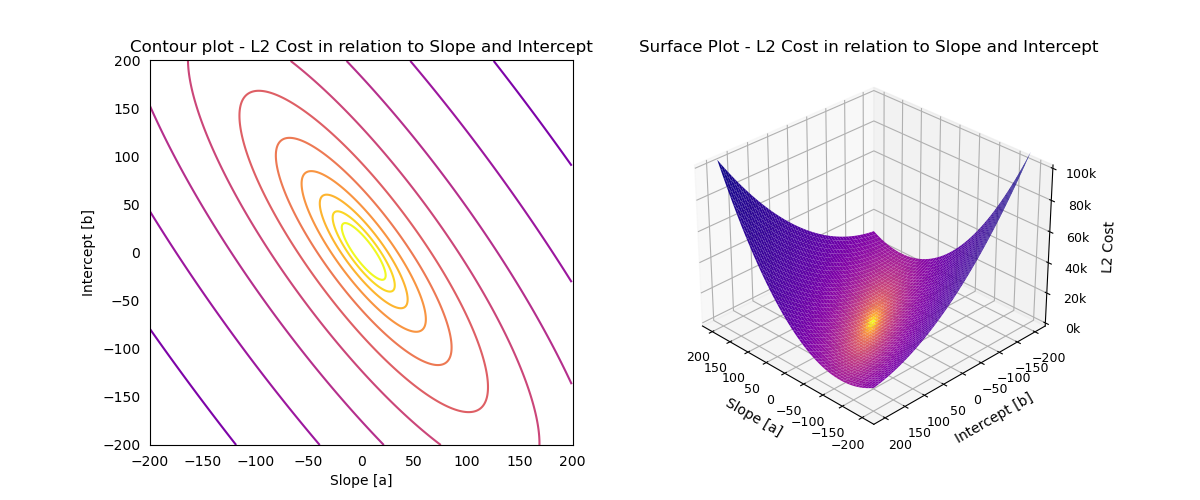

In [67]:
a = np.arange(-200, 200, 1) #Defining a range
b = np.arange(-200, 200, 1) #Defining b range
a, b = np.meshgrid(a, b)    #Creating a grid
L2Cost_z = L2_Cost(x_train, y_train, a, b) #Calculating L2 Cost for all combinations of a and b in the grid
lvls = [125,250,500,1000,2000,4000,8000,16000,32000,64000,128000,256000,512000] #Defining levels for the contour plot

# Initiating a figure
fig2 = plt.figure(dpi=100)
fig2.set_figheight(5)
fig2.set_figwidth(12)

# 2D - L2 Cost contour plot
ax = fig2.add_subplot(1, 2, 1)
ax.contour(a, b, L2Cost_z, lvls, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax.axis([-200, 200, -200, 200])
ax.set_title('Contour plot - L2 Cost in relation to Slope and Intercept')
ax.set_xlabel('Slope [a]')
ax.set_ylabel('Intercept [b]')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

# 3D - L2 Cost surface plot
ax = fig2.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Surface Plot - L2 Cost in relation to Slope and Intercept')
ax.set_xlabel('Slope [a]')
ax.set_ylabel('Intercept [b]')
ax.set_zlabel('L2 Cost')
ax.tick_params(axis='x', which='major', labelsize=9)
ax.tick_params(axis='y', which='major', labelsize=9)
ax.tick_params(axis='z', which='major', labelsize=9)
ax.axes.set_zlim3d(bottom=0, top=100000) 
ax.zaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos : f'{x / 1000:.0f}k'))
ax.zaxis.label.set_rotation(90)
ax.plot_surface(a, b, L2Cost_z, shade=True, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax.view_init(30, 135)


<center><h3 style="color:#DC3535">3. Gradient</h3></center>

By looking at the two plots above we can find the bottom of our "valley". The $a$ and $d$ coordinates are the parameters of the best fit line we are looking for. But what if we want to automate those steps and develop an algorithm that would find those parameters for us? That is where we can use the gradient. 

The plots above are described by the equation of the L2 Cost Function. You can think of the gradient as the derivative or slope of that function. The higher the gradient the steeper the slope. Its a very usefull property, as the steeper the slope the bigger will be the "steps" our machine learning algorithm will take.

Our L2 Cost Function has two variables: $a$ and $b$, so we will have to calculate the partial derivative for both of them. In abstract terms the partial derivative of $a$ will determine in which direction along the x-axis (labeled as Slope [a] above) the L2 Cost Function slopes up, while the partial derivative of $b$ will analogously determine in which direction the L2 Cost Function slopes up along the y-axis (labeled as Intercept [b] above).

So how does that look in practice? For our L2 Cost Function:

$$L2\_CostFunction(a, b) = \frac{1}{2n} \sum\limits_{i = 1}^{n} (a*x\_train^{(i)}+b - y\_train^{(i)})^2 \tag{5}$$

The partial derivative of $a$ and $b$ look as follows:


$$\frac{\partial}{\partial a}\ L2\_CostFunction(a,b)  = \frac{1}{n} \sum\limits_{i = 1}^{n} (a*x\_train^{(i)}+b - y\_train^{(i)})*x\_train^{(i)} \tag{6}$$
$$\frac{\partial}{\partial b}\ L2\_CostFunction(a,b)  = \frac{1}{n} \sum\limits_{i = 1}^{n} (a*x\_train^{(i)}+b - y\_train^{(i)}) \tag{7}$$

The gradient function has beeen implemented below. It has exactly the same inputs as the L2_Cost function we defined earlier.

In [68]:
def gradient_ab(x_train, y_train, a, b):
    grd_a, grd_b = 0, 0
    n = len(x_train)
    for i in range(n):
        diff_yhat_y = a * x_train[i] + b - y_train[i]
        grd_a += diff_yhat_y * x_train[i]
        grd_b += diff_yhat_y
    return grd_a / n, grd_b / n

<center><h3 style="color:#DC3535">4. Gradient Descent</h3></center>

Now that we we have a method to check the slope of our L2_Cost function at any given $a$ and $b$ coordinates we can implement the following algorithm, also known as gradient descent, to do the hard work for us.

Repeate those two steps until we reach convergence, which in our case is a fancy word for finding the minimum of our L2_Cost funtion:
$\newline  \ $
$\newline$ Step 1: $\  a = a -  \alpha * \frac{\partial}{\partial a} L2\_CostFunction(a, b) \newline$
$\newline  \ $
$\newline$ Step 2: $\  b = b -  \alpha * \frac{\partial}{\partial b} L2\_CostFunction(a, b) $

The $\alpha$ term above determines the learning rate of our model, which could also be considered as the size of the steps our model will make on its way down the L2 Cost "valley". Its worth noticing that there is a minus before the $\alpha$. The reason is that the partial derivatives we calculated in the previous step tell us in which direction the "valley" slopes up, and thanks to the minus our model can make steps in the opposite direction, towards the minimum of our L2_Cost function.

The gradient descent algorith is implemented below. It's entry arguments are $x\_train$, $y\_train$, some arbitrary starting values of $a$ and $b$, learning rate $\alpha$, and optionally the maximum number of iterations we want our model to go through (by default it is 10000). The stopping conditions for our gradient descent are that the algorithm reaches the max number of iteration or that both the partial derivatives of $a$ and $b$ are approximately 0 (their value rounded to the third decimal place). The intuition is that the minimum we are trying to find has a flat surface, thus the derivatives at those coordinates should equal to 0.

In [69]:
def gradient_descent(x_train, y_train, strt_a, strt_b, alpha, max_iter=10000):
    cost_hist, a_hist, b_hist = [], [], []
    a, b = strt_a, strt_b
    start, iter = True, 0

    while (round((grd:=gradient_ab(x_train, y_train, a, b))[0],3) != 0 or round(grd[1], 3) != 0) and iter < max_iter:
        a = a - alpha * grd[0]
        b = b - alpha * grd[1]

        cost_hist.append(L2_Cost(x_train, y_train, a, b))
        a_hist.append(a)
        b_hist.append(b)

        if start == True:
            print(f'Iteration {iter:>5},  a: {round(a_hist[-1], 2):>7},  b: {round(b_hist[-1], 2):>7},  cost: {round(cost_hist[-1], 2):>8}')
            start = False

        if (0 < iter <= 100 and iter%10 == 0) or  (100 < iter <= 1000 and iter % 100 == 0) or (1000 < iter <= 10000 and iter % 1000 == 0):
            print(f'Iteration {iter:>5},  a: {round(a_hist[-1], 2):>7},  b: {round(b_hist[-1], 2):>7},  cost: {round(cost_hist[-1], 2):>8}')
            prnt_counter = 0
    
        iter += 1

    print(f'Iteration {iter:>5},  a: {round(a_hist[-1], 2):>7},  b: {round(b_hist[-1], 2):>7},  cost: {round(cost_hist[-1], 2):>8}')
    print(f'Reached gradient  a: {grd[0]:.2f}, and gradient b: {grd[1]:.2f}')

    return a, b, cost_hist, a_hist, b_hist

Below we run our gradient descent algorithm with both the strating $a$ and $b$ set to $-150$, and with a learning rate $\alpha = 0.01$.

In [70]:
a_optimum, b_optimum, cost_hist, a_hist, b_hist = gradient_descent(x_train, y_train, -150, -150, 0.01)

Iteration     0,  a: -145.12,  b: -146.66,  cost: 58889.93
Iteration    10,  a: -103.33,  b: -117.96,  cost: 33377.19
Iteration    20,  a:  -72.01,  b:  -96.21,  cost: 18945.15
Iteration    30,  a:  -48.56,  b:  -79.69,  cost:  10780.1
Iteration    40,  a:  -31.03,  b:  -67.12,  cost:  6159.57
Iteration    50,  a:  -17.95,  b:  -57.51,  cost:  3543.82
Iteration    60,  a:   -8.21,  b:  -50.13,  cost:  2062.01
Iteration    70,  a:   -0.98,  b:  -44.44,  cost:  1221.62
Iteration    80,  a:    4.36,  b:  -40.01,  cost:   744.08
Iteration    90,  a:    8.29,  b:  -36.55,  cost:   471.86
Iteration   100,  a:   11.15,  b:   -33.8,  cost:   315.83
Iteration   200,  a:   16.94,  b:  -22.36,  cost:    79.65
Iteration   300,  a:   14.63,  b:  -17.71,  cost:    52.35
Iteration   400,  a:   12.35,  b:  -14.19,  cost:     34.7
Iteration   500,  a:   10.46,  b:  -11.34,  cost:    23.01
Iteration   600,  a:    8.93,  b:   -9.03,  cost:    15.28
Iteration   700,  a:    7.68,  b:   -7.14,  cost:    10.

<center><h3 style="color:#DC3535">5. Let's make some visualizations!</h3></center>


Now that the hard work is done, lets try to visualize this whole process. Firstly we can see how the results of our L2_Cost function decrease with each next iteration. You can see in the plot below that the cost drastically decreases from around 60000 to around 300 in the first 100 iterations. In the last 4000 iterations that decrease is faaar slower, with the cost decreasing from around 23 to 0.1. 

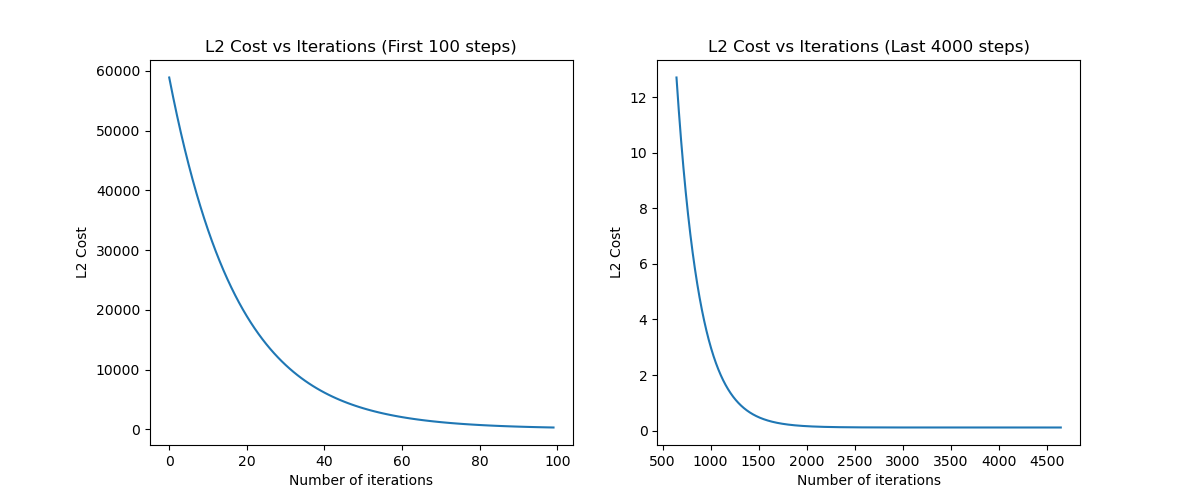

In [71]:
fig3 = plt.figure(dpi=100)
fig3.set_figheight(5)
fig3.set_figwidth(12)

ax1 = fig3.add_subplot(1, 2, 1)
ax1.set_title('L2 Cost vs Iterations (First 100 steps)')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('L2 Cost')
plt.plot(np.arange(0,100,1), cost_hist[:100])

ax2 = fig3.add_subplot(1, 2, 2)
ax2.set_title('L2 Cost vs Iterations (Last 4000 steps)')
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('L2 Cost')
plt.plot(np.arange(645,4645,1), cost_hist[645:])

plt.show()

<center><h4 style="color:#F49D1A">Next lets visualize the steps of our gradient descent on a contour plot

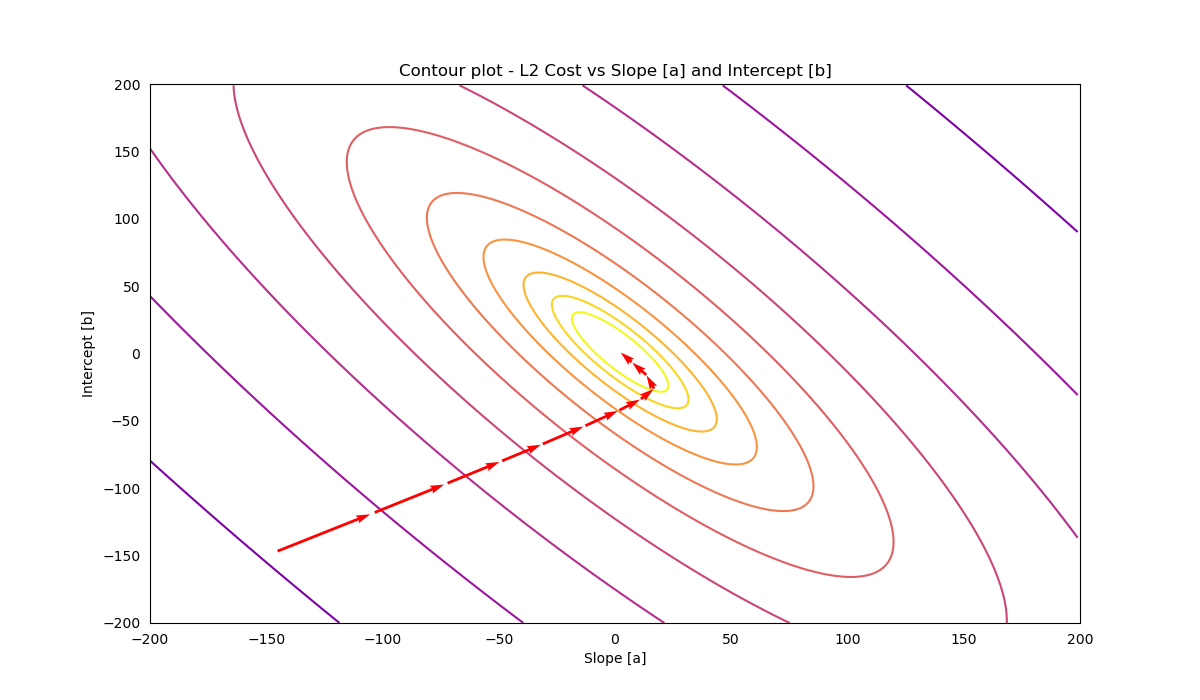

In [72]:
fig4 = plt.figure(dpi=100)
fig4.set_figheight(7)
fig4.set_figwidth(12)

# L2 Cost contour plot
ax = fig4.add_subplot(1, 1, 1)
ax.contour(a, b, L2Cost_z, lvls, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax.axis([-200, 200, -200, 200])
ax.set_title('Contour plot - L2 Cost vs Slope [a] and Intercept [b]')
ax.set_xlabel('Slope [a]')
ax.set_ylabel('Intercept [b]')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

for i in [(0,10), (10,10), (20,10), (30,10), (40, 15), (55,20), (75,25), (100,50), (150,200), (350,400),(750,3894)]:
    ax.quiver(a_hist[i[0]],b_hist[i[0]], a_hist[sum(i)] - a_hist[i[0]], b_hist[sum(i)] - b_hist[i[0]],
              scale_units='xy', 
              angles='xy', width=0.003, 
              minlength=1.5, 
              scale=1.05, 
              color='red',
              zorder = 2)
    
plt.show()

<center><h4 style="color:#F49D1A">Below you can see the animated gif version of the previous plot </center>

<p align="center">
  <img src="https://raw.githubusercontent.com/LucasOpoka/Machine_Learning/main/Univariate%20Linear%20Regression/regression_gif1.gif" alt="regression_gif1" />
</p>

<center><h4 style="color:#F49D1A">Now we can repeat the same but adding a 3D surface plot

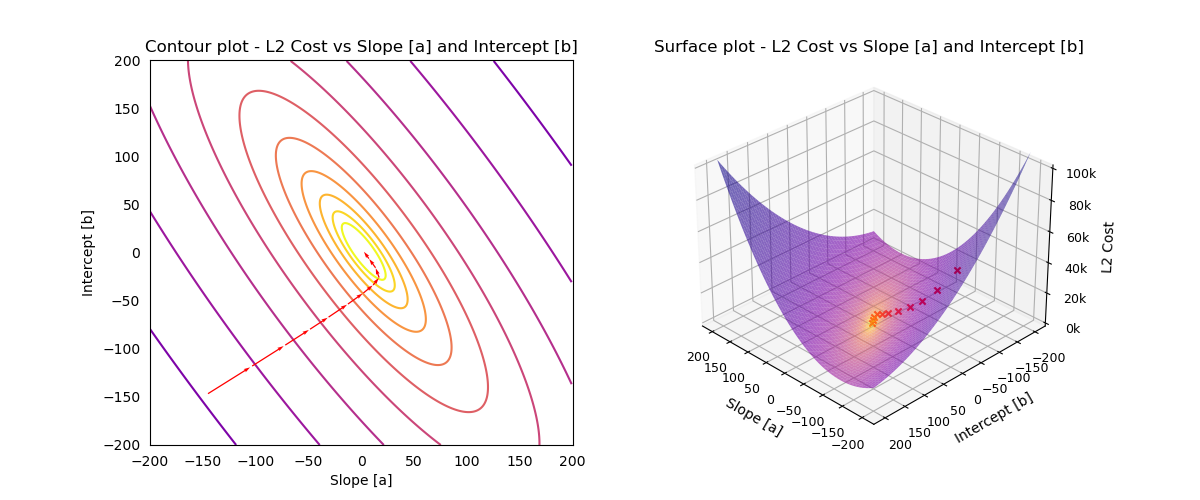

In [73]:
fig5 = plt.figure(dpi=100)
fig5.set_figheight(5)
fig5.set_figwidth(12)

# 2D - Cost contour plot
ax1 = fig5.add_subplot(121)
ax1.contour(a, b, L2Cost_z, lvls, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax1.axis([-200, 200, -200, 200])
ax1.set_title('Contour plot - L2 Cost vs Slope [a] and Intercept [b]')
ax1.set_xlabel('Slope [a]')
ax1.set_ylabel('Intercept [b]')
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none')


# 3D - Cost surface plot
ax2 = fig5.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Surface plot - L2 Cost vs Slope [a] and Intercept [b]')
ax2.set_xlabel('Slope [a]')
ax2.set_ylabel('Intercept [b]')
ax2.set_zlabel('L2 Cost')
ax2.tick_params(axis='x', which='major', labelsize=9)
ax2.tick_params(axis='y', which='major', labelsize=9)
ax2.tick_params(axis='z', which='major', labelsize=9)
ax2.axes.set_zlim3d(bottom=0, top=100000) 
ax2.zaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos : f'{x / 1000:.0f}k'))
ax2.zaxis.label.set_rotation(90)
ax2.plot_surface(a, b, L2Cost_z, shade=True, cmap=plt.get_cmap('plasma_r'), norm = LogNorm(), alpha = 0.6)
ax2.view_init(30, 135)

for i in [(0,10), (10,10), (20,10), (30,10), (40, 15), (55,20), (75,25), (100,50), (150,200), (350,400),(750,3894)]:

    ax1.quiver(a_hist[i[0]],b_hist[i[0]], a_hist[sum(i)] - a_hist[i[0]], b_hist[sum(i)] - b_hist[i[0]],
              scale_units='xy', 
              angles='xy', width=0.003, 
              minlength=1.5, 
              scale=1.05, 
              color='red',
              zorder = 2)
    
    ax2.scatter(a_hist[sum(i)], b_hist[(sum(i))], cost_hist[sum(i)] + 1, marker = 'x', color = 'red')

plt.show()

<center><h4 style="color:#F49D1A">Once again an animated gif version below </center>

<p align="center">
  <img src="https://raw.githubusercontent.com/LucasOpoka/Machine_Learning/main/Univariate%20Linear%20Regression/regression_gif2.gif" alt="regression_gif2" />
</p>

<center><h4 style="color:#F49D1A">Lastly, lets see how our model graphically fits a line to the training set porvided

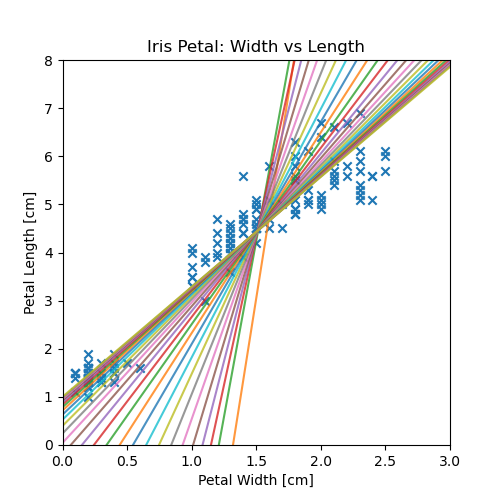

In [74]:
fig6 = plt.figure(dpi=100)
fig6.set_figheight(5)
fig6.set_figwidth(5)

# Scatter plot with regression lines
ax1 = fig6.add_subplot(111)
ax1.scatter(x_train, y_train, marker = 'x')
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 8)
ax1.set_title('Iris Petal: Width vs Length')
ax1.set_xlabel('Petal Width [cm]')
ax1.set_ylabel('Petal Length [cm]')


for i in range(100,3000,100):
    x1, x2 = 0, 3
    y1, y2 = x1 * a_hist[i] + b_hist[i], x2 * a_hist[i] + b_hist[i]
    ax1.plot([x1, x2], [y1, y2], alpha = 0.8)

<center><h4 style="color:#F49D1A">And here is the result of all the hard work in an animation! :) </center>

<p align="center">
  <img src="https://raw.githubusercontent.com/LucasOpoka/Machine_Learning/main/Univariate%20Linear%20Regression/regression_gif3.gif" alt="regression_gif3" />
</p>